In [0]:
 #importaçoes
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NBA dataset/regularseason19.csv')
# df.isnull().sum()
# print(df.shape)
# df.info()
df.head(10)
# df.columns

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612737,ATL,Atlanta Hawks,21900969,2020-03-11,ATL vs. NYK,L,265,131,48,106,453.00,14,41,341.00,21,26,808.00,15,38,53,26,6,3,17,25,0.0
1,22019,1610612748,MIA,Miami Heat,21900970,2020-03-11,MIA vs. CHA,L,239,98,39,84,464.00,15,44,341.00,5,6,833.00,9,27,36,32,8,5,14,17,-13.0
2,22019,1610612755,PHI,Philadelphia 76ers,21900971,2020-03-11,PHI vs. DET,W,241,124,42,83,506.00,14,33,424.00,26,32,813.00,13,37,50,28,7,4,13,18,14.0
3,22019,1610612752,NYK,New York Knicks,21900969,2020-03-11,NYK @ ATL,W,264,136,50,94,532.00,11,28,393.00,25,34,735.00,6,41,47,32,14,9,12,23,0.0
4,22019,1610612743,DEN,Denver Nuggets,21900973,2020-03-11,DEN @ DAL,L,240,97,39,83,0.47,14,39,359.00,5,8,625.00,3,37,40,23,6,4,15,20,-7.8
5,22019,1610612742,DAL,Dallas Mavericks,21900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,457.00,12,35,343.00,17,23,739.00,13,39,52,23,9,2,10,14,8.0
6,22019,1610612765,DET,Detroit Pistons,21900971,2020-03-11,DET @ PHI,L,241,106,39,84,464.00,11,35,314.00,17,25,0.68,6,26,32,25,10,3,8,24,-14.2
7,22019,1610612766,CHA,Charlotte Hornets,21900970,2020-03-11,CHA @ MIA,W,239,109,37,82,451.00,17,34,0.50,18,22,818.00,15,35,50,20,7,4,14,9,12.2
8,22019,1610612739,CLE,Cleveland Cavaliers,21900962,2020-03-10,CLE @ CHI,L,240,103,40,80,0.50,6,24,0.25,17,23,739.00,9,26,35,29,9,5,18,15,-0.6
9,22019,1610612759,SAS,San Antonio Spurs,21900965,2020-03-10,SAS vs. DAL,W,239,119,46,89,517.00,15,32,469.00,12,15,0.80,6,34,40,32,11,10,11,15,1.2


# Glossary dataset
GP Games Played </br>                
W Wins </br>
L Losses</br>
WIN% Win Percentage </br>
MIN Minutes Played </br>
FGM Field Goalds Made </br>
FGA Field Goals Attempted</br>
FG% Field Goal Percentage </br>
3PM 3 Point Field Goals Made </br>
3PA 3 Point Field Goals Attempted </br>
3P% 3 Point Field Goals Percentage </br>
FTM Free Throws Made </br>
FTA Free Throws Attempted </br>
FT% Free Throw Percentage</br>
OREB Offensive Rebounds </br>
DREB Defensive Rebounds </br>
REB Rebounds </br>
AST Assists </br>
TOV Turnovers </br>
STL Steals </br>
BLK Blocks</br>
BLKA Blocked Field Goal Attempts </br>
PF Personal Fouls </br>
PFD Personal Fouls Drawn </br>
PTS Points </br>
+/- Plus Minus</br>

### Plotagem histograma de todas variáveis quantitativas do dataset

In [0]:
#Seleção das variáveis de valeres quantitativos
columns = ['PTS', 'FGM', 'FGA', 'FG_PCT','FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB','REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS']
print(len(columns))
df_lean = df[columns]

19


In [0]:
#Plotagem histogramas
plt.style.use('ggplot')
df_lean.hist(bins=50, figsize=(20,15))

### Pandas Profile - Resumo brabo do comportamento dos dados

Exportação da página html para o conjunto de datasets do meu problema

In [0]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_lean, title='Profile Resume', html={'style':{'full_width': True}})
profile.to_notebook_iframe()
profile.to_file(output_file="/content/drive/My Drive/Colab Notebooks/NBA dataset/dataframe_report.html"1)

#BINS

array que vai do valor mínino até o máximo de cada coluna de dados. Util para plotar histogramas

In [0]:
bins = {}
'''
    columns: lista com o nomes de todas as colunas que contém apenas valores 
    quantitativos na minha base de dados 'df_lean = dataframe_enxuto' 
'''
for column in columns: bins[column] = np.arange(np.min(df_lean[column]),np.max(df_lean[column]))

In [0]:
#Correlação r de Pearsor de free throws made, com os demais atributos
corr_matrix = df_lean.corr()
corr_matrix['FTA'].sort_values(ascending=False)

FTA           1.000000
FTM           0.934459
PTS           0.283268
PF            0.251478
FT_PCT        0.120131
REB           0.118141
DREB          0.102464
TOV           0.096241
PLUS_MINUS    0.077223
OREB          0.063011
STL           0.047198
BLK           0.010639
FG_PCT        0.009754
FG3_PCT      -0.039975
FG3A         -0.074690
FG3M         -0.115277
AST          -0.167556
FGM          -0.177479
FGA          -0.196641
Name: FTA, dtype: float64

In [0]:
#Correlação r de Pearsor de free throws made, com os demais atributos
corr_matrix['FGA'].sort_values(ascending=False)

FGA           1.000000
OREB          0.500787
REB           0.382326
FGM           0.374740
FG3A          0.322900
PTS           0.238412
DREB          0.139014
AST           0.127789
FG3M          0.089206
PF            0.072644
STL           0.067086
BLK           0.053840
FT_PCT       -0.027304
PLUS_MINUS   -0.028623
FG3_PCT      -0.060803
FG_PCT       -0.086368
FTM          -0.192868
FTA          -0.196641
TOV          -0.366504
Name: FGA, dtype: float64

(array([0.00258933, 0.00207147, 0.0062144 , 0.01191093, 0.01294666,
        0.01657172, 0.03262558, 0.03780425, 0.04039358, 0.05903677,
        0.0538581 , 0.05075091, 0.06576903, 0.0600725 , 0.06732263,
        0.0538581 , 0.05282237, 0.06369757, 0.05230451, 0.04350078,
        0.03780425, 0.03573278, 0.03107198, 0.02951838, 0.02226825,
        0.01553599, 0.00983946, 0.00673226, 0.0062144 , 0.00569653,
        0.00673226, 0.0015536 , 0.0031072 , 0.00207147]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37]),
 <a list of 34 Patch objects>)

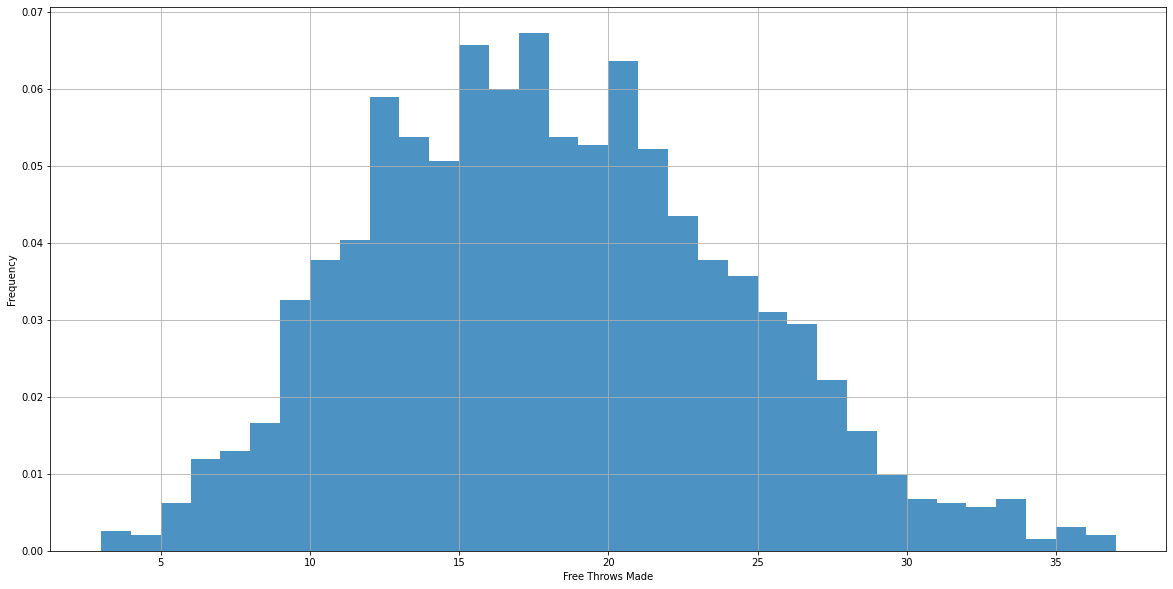

In [0]:
# plot histograma mais detalhado das caracteristicas de df_lean
plt.figure(figsize=(20,10))
plt.grid(True)
plt.style.use('ggplot')
plt.xlabel('Free Throws Made')
plt.ylabel('Frequency')
plt.hist(df_lean['FTM'], bins=bins['FTM'], density=True, alpha=0.8) #Mudar essa linha de acordo com o histograma que melhor deve ser analisado


In [0]:
#Escolhendo target do meu dataset 
from sklearn.preprocessing import OneHotEncoder
y = df['WL']
y.head()

0    L
1    L
2    W
3    W
4    L
Name: WL, dtype: object

In [0]:
#Algoritmo Boruta para encontrar uma correlação entre as variáveis
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(df_lean.to_numpy(), y.to_numpy())

_

In [0]:
# print(feat_selector.support_)
# print(feat_selector.ranking_)
# print(feat_selector.n_features_)
# print(feat_selector.support_)

borutin = pd.DataFrame(columns, feat_selector.ranking_)

print(borutin)

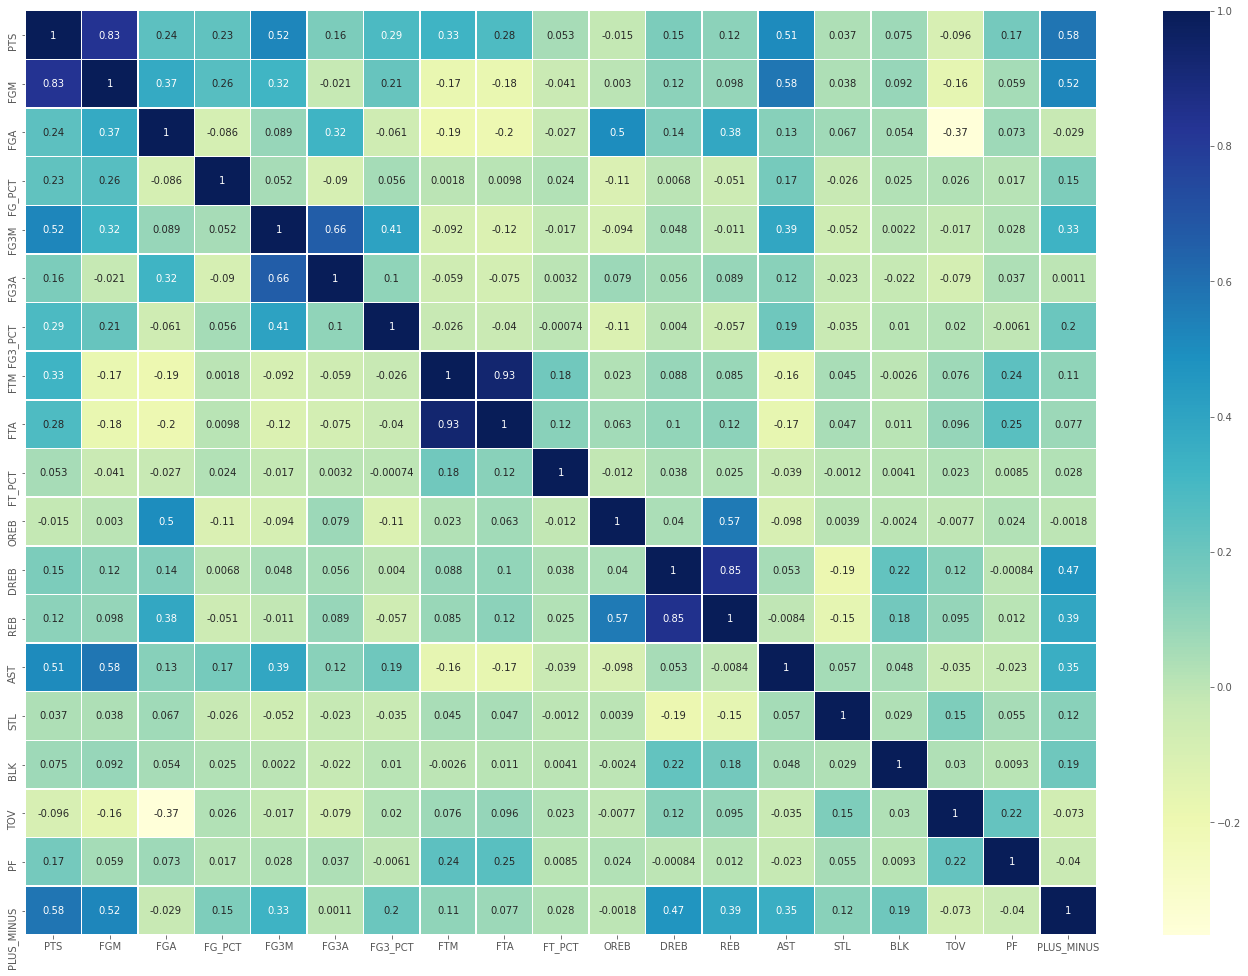

In [0]:
#correlações das variáveis através do seaborn
correlacoes = df_lean.corr()

plt.figure(figsize=(24,17))
sns.heatmap(data=correlacoes, annot=True, linewidths=0.5,  cmap="YlGnBu")

### Visualização entre a relação de variáveis alvo do meu dataset

In [0]:
figura1 = px.scatter(x=df_lean.FGM, y=df_lean.PTS)
figura1.show()

### Distribuição normal

É uma curva simétrica em torno de um ponto médio, apresentando assim o famoso formato de sino. 


In [0]:

labels = ['Free Throws Attempted distribution']
fta_distribution = ff.create_distplot([df_lean.FTA], labels)
fta_distribution.show()

In [0]:
# # kewness = 0 : normally distributed.
# skewness > 0 : more weight in the left tail of the distribution.
# skewness < 0 : more weight in the right tail of the distribution. 
from scipy import stats
stats.skew(df_lean.FTA)

0.26993410594090195

In [0]:
columns_more_important = ['PTS', 'FGM', 'FG3M', 'AST', 'PLUS_MINUS', 'DREB', 'FTM']
df_select = df[columns_more_important]
df_select.head()
# df_select.isnull().sum()
# df_select.info()


,PTS,FGM,FG3M,AST,PLUS_MINUS,DREB,FTM
0,131,48,14,26,0.0,38,21
1,98,39,15,32,-13.0,27,5
2,124,42,14,28,14.0,37,26
3,136,50,11,32,0.0,41,25
4,97,39,14,23,-7.8,37,5


In [0]:
labels = ['+-']
fta_distribution = ff.create_distplot([df_select.PLUS_MINUS], labels)
fta_distribution.show()

## Split do dados, treino e teste


In [0]:
X = df_select
y_encoded, y_categories = df.WL.factorize()


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=192)

In [0]:
#Verificando o tamanho o tamanho bate 80% 20%
print('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print('y_test: numero de linhas e colunas: {}'.format(y_test.shape))


X_train: numero de linhas e colunas: (1547, 7)
X_test: numero de linhas e colunas: (387, 7)
y_train: numero de linhas e colunas: (1547,)
y_test: numero de linhas e colunas: (387,)


In [0]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [0]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_linear_regression = lin_model.predict(X_test)

In [0]:
rmse_linear_regression = (np.sqrt(mean_squared_error(y_test, y_pred_linear_regression)))

In [0]:

rmse_linear_regression

0.3065506709172939

In [0]:
print(y_pred_linear_regression[:10].round())

[1. 0. 0. 1. 1. 1. 0. 0. 1. 1.]


In [0]:
#arrendonda os valores preditos pelo algoritmo de regressão linear e converte os items da lista de float para inteiro
pred_linear_regresson_list = y_pred_linear_regression.round().tolist()
new_list = [int(i) for i in pred_linear_regresson_list] 
print(type(new_list[0]))
print(len(new_list))
print(len(pred_linear_regresson_list))
print(min(new_list))



<class 'int'>
387
387
-1


In [0]:
y_pred_linear_regression_rounded = []

for item in new_list:
    if item > 1:
        y_pred_linear_regression_rounded.append(1)
    elif item < 0:
        y_pred_linear_regression_rounded.append(0)
    else:
        y_pred_linear_regression_rounded.append(item)
print(len(y_pred_linear_regression_rounded))
print(y_pred_linear_regression_rounded[:10])

387
[1, 0, 0, 1, 1, 1, 0, 0, 1, 1]


In [0]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_linear_regression_rounded, normalize=False)

380

In [0]:
# print(y_test[:20], max(y_pred_linear_regression))

0.0


In [0]:
df_results = pd.DataFrame()
df_results['valor_real'] = y_test
df_results['valor_linear_regression'] = y_pred_linear_regression_rounded



In [0]:
df_results.loc(0)

In [0]:
import plotly.graph_objects as go

fig = go.Figure()

#linhas com dados teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real',
                         line=dict(color='violet')))

#Linha predict regressão linear 
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_linear_regression,
                         mode='markers',
                         line=dict(color='black'),
                         name='Valor predito regressão linear'))

fig.show()

### Árvore de decisão


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
regressor = DecisionTreeClassifier()

In [0]:
regressor.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_tree_pred = regressor.predict(X_test)

In [0]:
df_results['valor_predito_arvore'] = y_tree_pred

In [0]:
df_results.head(10)

,valor_real,valor_linear_regression,valor_predito_arvore
0,1,1,1
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1
5,1,1,1
6,0,0,0
7,0,0,0
8,1,1,1
9,1,1,1


In [0]:
metrics.accuracy_score(y_test, y_tree_pred)

1.0

In [0]:

fig = go.Figure()

#linhas com dados teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real',
                         line=dict(color='green')))

#Linha predict regressão linear 
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='markers',
                         line=dict(color='black'),
                         name='Valor predito regressão linear'))

fig.show()

### Validação Cruzada tree decision


In [0]:
#Validação cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y_encoded, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Stardard deviation", scores.std())

In [0]:
display_scores(tree_rmse_scores)

Scores: [0.10153462 0.         0.         0.         0.         0.
 0.         0.         0.         0.07198158]
Mean: 0.017351619158823134
Stardard deviation 0.035326815065111865


###Validação Cruzada modelo regressão linear

In [0]:
lin_scores = cross_val_score(lin_model, X, y_encoded, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.31250872 0.29735599 0.27186705 0.29213248 0.27193587 0.29128116
 0.31290166 0.33592017 0.30584654 0.29815257]
Mean: 0.298990222098131
Stardard deviation 0.018342691502319465
